In [1]:
import pickle
import matplotlib.pyplot as plt

# import mod_kernik as kernik

#############################################
from scipy.integrate import ode, solve_ivp
import os, sys, time
import numpy as np
import matplotlib.pyplot as plt
import pickle
import bisect

sys.path.append('../Protocols')
from pacing_protocol import PacingProtocol
from leakstaircase import LeakStaircase

sys.path.append('../')
import simulator_scipy

sys.path.append('../Lib')
import model_response

sys.path.append('../Models')
from br1977 import BR1977
from ord2011JK_v1 import ORD2011

import mod_trace as trace

In [2]:
def get_high_fitness(ga_result):
    best_individual = ga_result.generations[0][0]

    for i, gen in enumerate(ga_result.generations):
        best_in_gen = ga_result.get_high_fitness_individual(i)
        if best_in_gen.fitness > best_individual.fitness:
            best_individual = best_in_gen

    return best_individual

In [3]:
def plot_current_conributions():
    trial_conditions = "trial_steps_ramps_ORD2011_2_2_4_-120_60"
    currents = []
    
    if 'ORD2011' in trial_conditions:
        currents = ['I_Na', 'I_NaL', 'I_to', 'I_CaL', 'I_Kr', 'I_Ks', 'I_K1' ]         
    elif 'BR1977' in trial_conditions:
        currents = ['I_Na', 'I_si', 'I_K1', 'I_x1']

    for i, current in enumerate(currents):
        ga_result = pickle.load(open(f'ga_results/{trial_conditions}/ga_results_{current}_artefact_False', 'rb'))
        
        best_individual = get_high_fitness(ga_result)
        protocol = best_individual.protocol
        
        if 'ORD2011' in trial_conditions:
            model = ORD2011(protocol)
        elif 'BR1977' in trial_conditions:
            model = BR1977(protocol)  
        
        
        tr = model_response.get_model_response_JK(model, protocol)
        # k = kernik.KernikModel(is_exp_artefact=True)        
        # tr = k.generate_response(proto, is_no_ion_selective=False)

        tr.plot_currents_contribution(current, is_shown=True, title=current,
                saved_to=f'./ga_results/{trial_conditions}/{current}.svg')


In [4]:
def main():
    plot_current_conributions()    

fjsalkfjalksjdfl
There is no pre-step simulation.


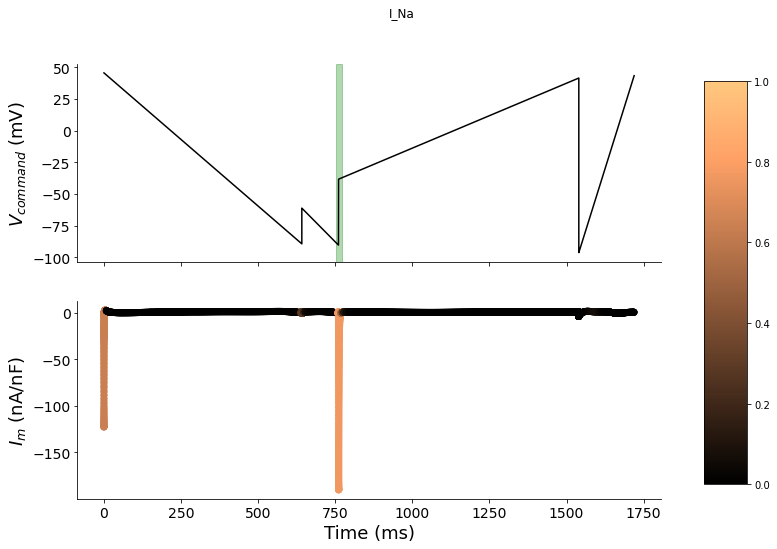

There is no pre-step simulation.


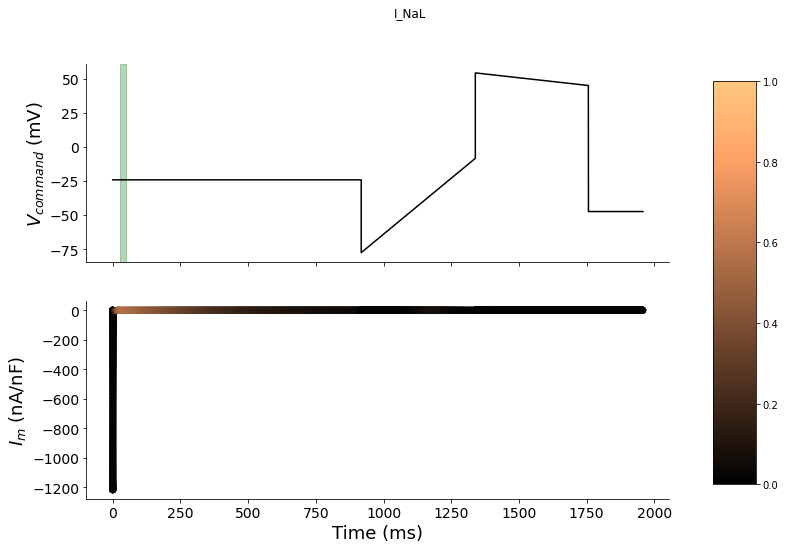

There is no pre-step simulation.


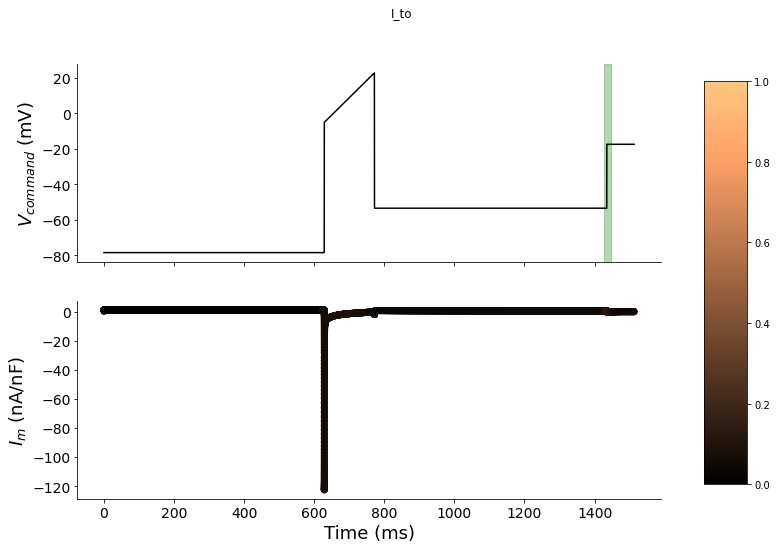

There is no pre-step simulation.


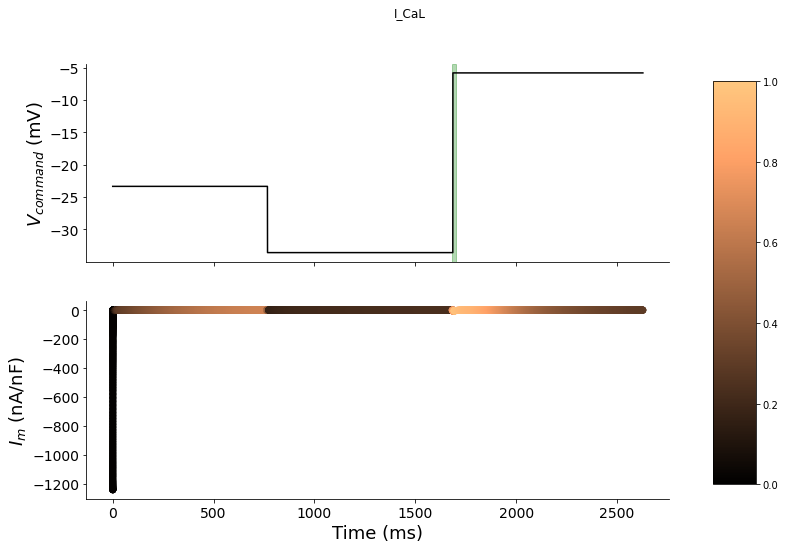

There is no pre-step simulation.


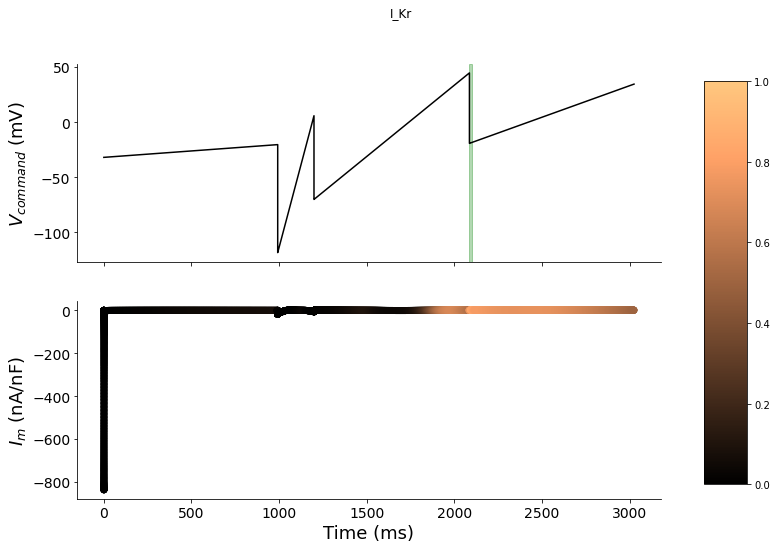

There is no pre-step simulation.


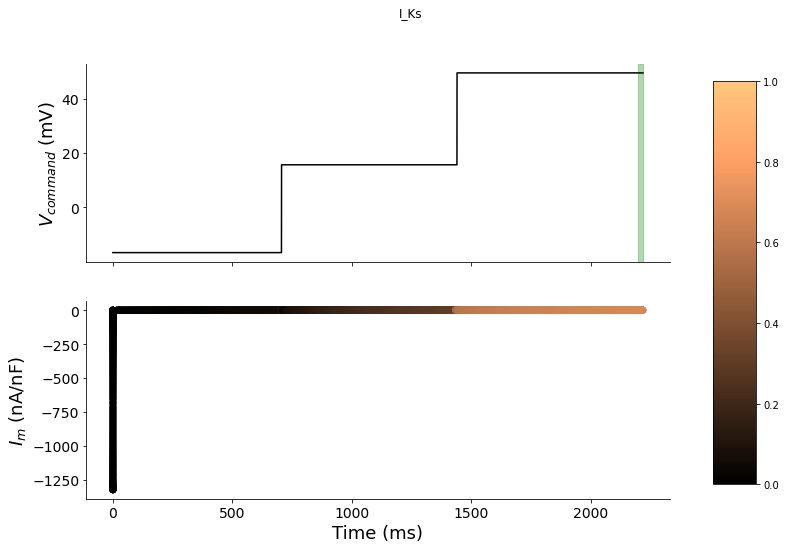

There is no pre-step simulation.


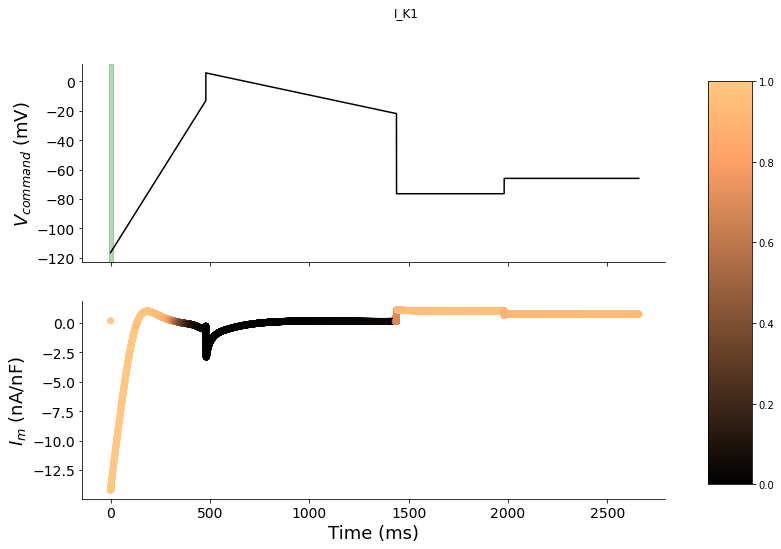

=====Complete==============================


In [5]:
if __name__ == '__main__':
    main()
    print("=====Complete==============================")